---
# BASİT DOĞRUSAL REGRESYON
---

# MODEL KURMA

In [200]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


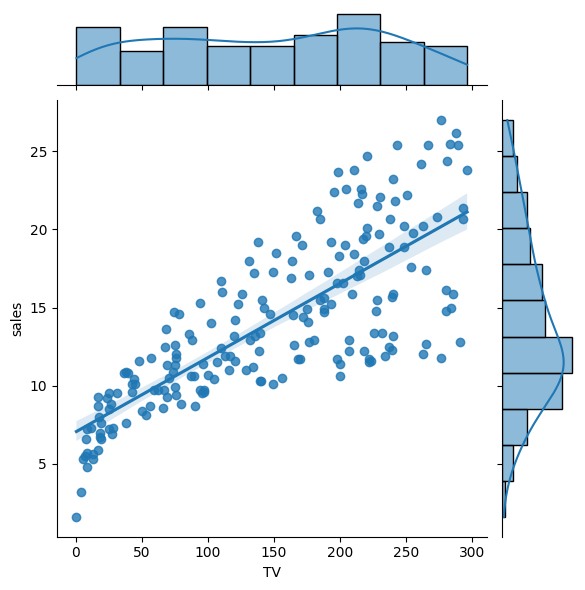

In [203]:
import seaborn as sns
sns.jointplot(data=df, x="TV", y="sales", kind="reg");

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
X = df[["TV"]]
Y = df[["sales"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [206]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [207]:
reg = LinearRegression() #model nesnesi oluşturma
model = reg.fit(X,Y) #modeli kur
model

LinearRegression()

In [208]:
str(model)

'LinearRegression()'

In [209]:
dir(model) #nesneden alabileceğimiz bilgiler

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',

In [210]:
model.intercept_ # sabitimiz b0

array([7.03259355])

In [211]:
model.coef_ # katsayımız b1

array([[0.04753664]])

In [212]:
#rkare
model.score(X,Y) # rkare bağımlı değişkendeki değişikliğin bağımsız değişkenlerle açıklanma yüzdesi.

0.611875050850071

# MODEL TAHMİN

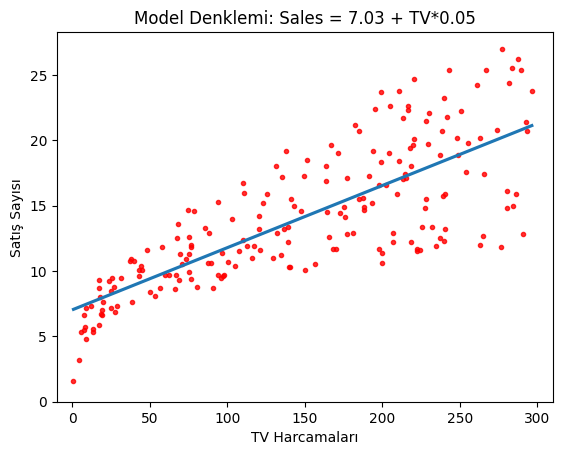

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color':'r','s':9}) # ci:None güven aralığı koyma
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05") # üstte bulduk
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)   #eksenlerin limitleri
plt.ylim(bottom=0); #eksenlerin limitleri

In [214]:
#üstteki modeli kullanarak tahminde bulun
model.predict([[165]])

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [215]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [216]:
yeni_veri = [[5],[15],[30],[400],[1000]] #300'den büyük veri yok ama tahmin edebiliyoruz;

In [217]:
model.predict(yeni_veri)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 7.27027675],
       [ 7.74564316],
       [ 8.45869276],
       [26.04724972],
       [54.56923398]])

# Artıklar ve Makine Öğrenmesinin Önemi
* MSE : Hata Kareler Ortalaması
* RMSE: Hata Kareler Ortalaması Karekökü

In [218]:
Y.head() #gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [219]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [220]:
gercek_y = Y[0:10]

In [221]:
tahmin_edilen_y =  pd.DataFrame(model.predict(X)[0:10])

In [222]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis=1)
hatalar.columns = ["Gercek y","Tahmin Edilen y"]
hatalar

,Gercek y,Tahmin Edilen y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [223]:
hatalar["hata"] = hatalar["Gercek y"] - hatalar["Tahmin Edilen y"]
hatalar

,Gercek y,Tahmin Edilen y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [224]:
hatalar["hata kareler"] = hatalar["hata"]**2
hatalar

,Gercek y,Tahmin Edilen y,hata,hata kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [225]:
hatalar["hata kareler"].mean() #hata kareler ortalaması

np.float64(9.290350329638102)

---
# ÇOKLU DOĞRUSAL REGRESYON
---

# MODEL OLUŞTURMA

In [226]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
print(str(df.head()))
X = df.drop("sales", axis=1) # sales hariç hepsi X bağımsız değişkeni
Y = df[["sales"]]            # Y bağımlı değişkeni
print(str(X.head()))
print(str(Y.head()))

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
   sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9


## Statsmodels ile model kurmak

In [227]:
import statsmodels.api as sm
lm = sm.OLS(Y,X)

In [228]:
model = lm.fit()

In [229]:
model.summary() # R-squared (uncentered)     :	0.982 bağımsız değişkenlerin bağımlı değişkendeki değişikliği açıklama yüzdesi (oldukça iyi açıklıyor)
                # Adj. R-squared (uncentered):	0.982 bunu kullanmak daha sağlıklı olur.
                # Prob (F-statistic)         :	2.43e-171 <0.05 model anlamlı
                #
                # coef : b1 b2 b3
                # t    : değişkenler anlamlı mı? evet. t<0.05
                # radido'da 1 birim değişiklik olursa satışlarda 0.2222 değişiklik olur.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):                   2.43e-171
Time:                        22:21:52   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## scikit learn ile model kurmak

In [230]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # model nesnesi oluştur.
model = lm.fit(X,Y)     # modeli kur.

In [231]:
model.intercept_   # b0

array([2.93888937])

In [232]:
model.coef_ # b1 b2 b3

array([[ 0.04576465,  0.18853002, -0.00103749]])

# MODEL TAHMİN

Sales = 2.94 + TV*0.04 + radio * 0.19 - newspaper * 0.001

örnek soru: 30 birim tv,10 birim radio,40 birim gazaete ; satışlar ne olur? 

In [233]:
yeni_veri = [[30],[10],[40]]

In [234]:
df_yeniveri = pd.DataFrame(yeni_veri).T
df_yeniveri

,0,1,2
0,30,10,40


In [235]:
model.predict(df_yeniveri)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.15562918]])

In [236]:
from sklearn.metrics import mean_squared_error

In [237]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [238]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [239]:
MSE = mean_squared_error(Y, model.predict(X)) # gerçek,tahmin değerleri
MSE

np.float64(2.784126314510936)

In [240]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

np.float64(1.6685701407225697)

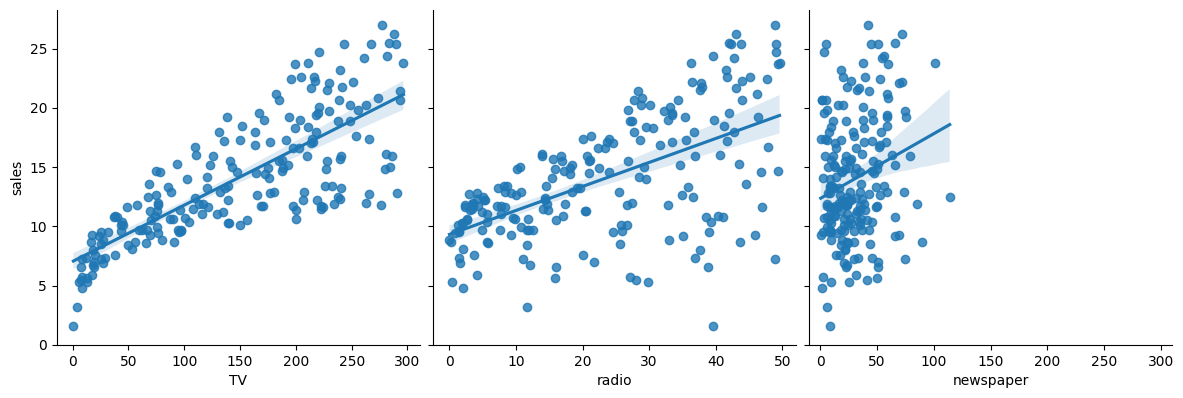

In [241]:
# çok yararlı bilgi değil, zaten eğitime dahil de değil.
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(df, x_vars=["TV","radio","newspaper"], y_vars="sales",height=4,aspect=1,kind="reg")
plt.xlim(-10,310)   #eksenlerin limitleri
plt.ylim(bottom=0); #eksenlerin limitleri

## MODEL TUNİNG (MODEL DOĞRULAMA)

In [242]:
print(str(X.head()))
print(str(Y.head()))

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
   sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9


In [243]:
#sinama seti
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20,random_state=1) # X,Y, 80'e 20 böl(train,test), her çalıştırınca rastgele vermesin diye seed

In [244]:
X_train.head()

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [245]:
Y_train.head()

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [246]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [247]:
Y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [248]:
lm = LinearRegression()         # Model nesnesi oluştur.
model = lm.fit(X_train,Y_train) # Modeli kur.

In [249]:
np.sqrt(mean_squared_error(Y_train,model.predict(X_train))) #train hatası

np.float64(1.736902590147092)

In [250]:
np.sqrt(mean_squared_error(Y_test,model.predict(X_test))) #test hatası

np.float64(1.4113417558581587)

* k katlı cross validation 
*
* hangi 80'e 20'yi almalıyız? 
* farklı sorunlar çıkartabilir o yüzden bunu kullanıyoruz.

In [251]:
from sklearn.model_selection import cross_val_score

In [252]:
cross_val_score(model,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")#cv:10 k katlı cv 10 katlı cv olsun., scoring="neg_mean_squared" hata kareler ortalamasıyla scorelansın

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

In [253]:
#cv ile elde edilmiş mse
np.mean(-cross_val_score(model,X_train,Y_train,cv=10,scoring="neg_mean_squared_error"))

np.float64(3.187711520944357)

In [254]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model,X_train,Y_train,cv=10,scoring="neg_mean_squared_error")))
# veri setinden farklı şekilde seçilebileek varyasonlara 
# göre hata hesapladık ve 10 defa hesapladık. O yüzden daha doğru

np.float64(1.7854163438661463)

---
# RİDGE REGRESYON
---

Gerekli Kütüphaneler

In [255]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

Veri Seti

In [256]:
df  = pd.read_csv("Hitters.csv")                            #veriyi oku
df  = df.dropna()                                           #eksik değerleri at
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik değişkenleri dummy değişkenlere dönüştür
                                                            # Bu adım, kategorik değişkenlerin sağladığı bilgiyi daha iyi alabilmek için one-hot encoding uygular
Y   = df["Salary"]                                          # bağımlı değişken
X_  = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64") #kategorik ve bağımlı değişkeni çıkartarak X_ değişkenine atadık.
X   = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)           # Bağımsız değişkenlerin son halini oluşturmak için, 
                                                                                    # dummy değişkenleri (kategorik değişkenlerin dönüştürülmüş halleri) X_'e ekle 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42) # %25 test için ayrıldı.

In [257]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [258]:
df.shape

(263, 20)

# MODEL KURMA

In [281]:
ridge_model = Ridge(alpha=5).fit(X_train, Y_train) #basit olarak böyle, aşağıda asıl kurma kısmı var
ridge_model

Ridge(alpha=5)

In [260]:
ridge_model.get_params()

{'alpha': 5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [261]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [263]:
ridge_model.intercept_

np.float64(-3.4251968687166254)

In [270]:
np.linspace(10,-2,100) # eşit aralıklı 10 ile -2 arasında 100 tane sayısı

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [271]:
lambdalar =10**np.linspace(10,-2,100)*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [282]:
ridge_model = Ridge() # Asıl modeli kurma
katsayilar  = []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,Y_train)
    katsayilar.append(ridge_model.coef_) #her lamdanın 19 tane katsayisi var
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

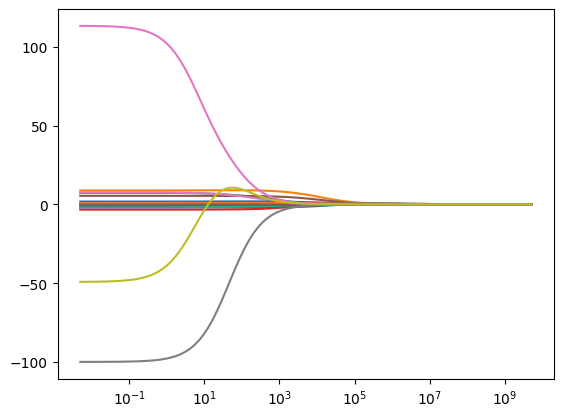

In [284]:
ax = plt.gca() #gözlemleyelim
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")    # logaritmik dönüşüm yapsın
                        #renkler katsayıların değerleri
                        #x ekseni lambda değerleri